C:\Users\xiato\AppData\Local\Temp\ipykernel_51016\4068154001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_cough_df["day_start"] = pd.to_datetime(ny_cough_df["day_start"]).dt.strftime("%m/%d/%Y")


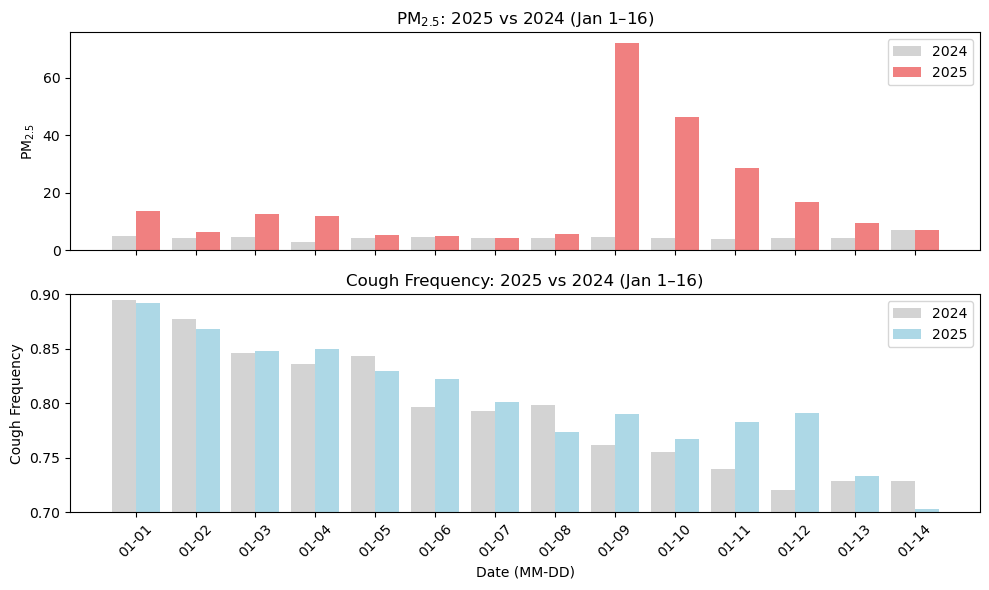

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 读取数据 
cough_df = pd.read_csv("E:/sleep cycle/data/cough_rate/cough_per_day_us_state.csv") 

# air_quality_df = pd.read_csv("new-york-air-quality.csv") 
air_quality_df = pd.read_csv("E:/sleep cycle/data/air_quality/us_LA/LA-air-quality.csv") 

# 过滤 NY 数据 
ny_cough_df = cough_df[cough_df["Ip_Region_Subdivision"] == "CA"] 
# 确保日期格式一致，转换为 YYYY-MM-DD 
ny_cough_df["day_start"] = pd.to_datetime(ny_cough_df["day_start"]).dt.strftime("%m/%d/%Y") 
air_quality_df["date"] = pd.to_datetime(air_quality_df["date"]).dt.strftime("%m/%d/%Y") # 按日期合并 
merged_df = ny_cough_df.merge(air_quality_df, left_on="day_start", right_on="date", how="inner")

# 确保日期为 datetime 格式
merged_df["day_start"] = pd.to_datetime(merged_df["day_start"])

# 分别筛选 2024 和 2025 年的 1月1–16日
df_2024 = merged_df[
    (merged_df["day_start"] >= "2024-01-01") & 
    (merged_df["day_start"] <= "2024-01-16")
].copy()
df_2025 = merged_df[
    (merged_df["day_start"] >= "2025-01-01") & 
    (merged_df["day_start"] <= "2025-01-16")
].copy()

# 为绘图创建“对齐用的日期标签”（统一使用1月1–16日）
df_2024["day_label"] = df_2024["day_start"].dt.strftime("%m-%d")
df_2025["day_label"] = df_2025["day_start"].dt.strftime("%m-%d")

# 确保两个年份的日期对齐（按day_label合并）
aligned_df = pd.merge(df_2025, df_2024, on="day_label", suffixes=("_2025", "_2024"))

# 绘图
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
width = 0.4
x = range(len(aligned_df))

# === 2️⃣ PM2.5 ===
axes[0].bar([i - width/2 for i in x], aligned_df["median_2024"], width=width, color="lightgray", label="2024")
axes[0].bar([i + width/2 for i in x], aligned_df["median_2025"], width=width, color="lightcoral", label="2025")

#sns.lineplot(ax=axes[0], x=x, y=aligned_df["median_2025"], color="r")
axes[0].set_title("PM$_{2.5}$: 2025 vs 2024 (Jan 1–16)")
axes[0].set_ylabel("PM$_{2.5}$")
axes[0].legend()

# === 1️⃣ 咳嗽率 ===
axes[1].bar([i - width/2 for i in x], aligned_df["cough_rate_2024"], width=width, color="lightgray", label="2024")
axes[1].bar([i + width/2 for i in x], aligned_df["cough_rate_2025"], width=width, color="lightblue", label="2025")

#sns.lineplot(ax=axes[1], x=x, y=aligned_df["cough_rate_2025"], color="b")
axes[1].set_title("Cough Frequency: 2025 vs 2024 (Jan 1–16)")
axes[1].set_ylabel("Cough Frequency")
axes[1].set_ylim(0.7, 0.9)
axes[1].legend()

# 统一x轴
axes[1].set_xticks(x)
axes[1].set_xticklabels(aligned_df["day_label"], rotation=45)
plt.xlabel("Date (MM-DD)")
plt.tight_layout()

plt.savefig("fire.png", dpi=300, bbox_inches='tight')


plt.show()


In [2]:
df_2024

,Unnamed: 0,Ip_Region_Subdivision,day_start,total_session_hours,total_cough_events,cough_rate,date,min,max,median,q1,q3,stdev,count,day_label
105,5675,CA,2024-01-01,4.835914e+08,432479903.0,0.894309,01/01/2024,3.41,24.83,5.08,4.12,5.66,4.136,24,01-01
106,5727,CA,2024-01-02,8.045532e+08,705557822.0,0.876956,01/02/2024,2.75,10.09,4.26,3.09,6.50,2.276,24,01-02
107,5779,CA,2024-01-03,6.553952e+08,554817819.0,0.846539,01/03/2024,2.80,23.37,4.57,3.42,9.09,6.031,24,01-03
108,5831,CA,2024-01-04,9.882821e+08,826543836.0,0.836344,01/04/2024,2.13,3.91,3.06,2.57,3.34,0.514,24,01-04
109,5883,CA,2024-01-05,6.199687e+08,522943112.0,0.843499,01/05/2024,3.54,6.63,4.26,3.88,4.95,0.860,24,01-05
110,5935,CA,2024-01-06,6.761680e+08,538666063.0,0.796645,01/06/2024,3.40,13.21,4.59,3.83,6.20,2.792,24,01-06
111,5987,CA,2024-01-07,5.971049e+08,473536358.0,0.793054,01/07/2024,2.78,10.67,4.26,4.05,4.68,2.068,24,01-07
112,6039,CA,2024-01-08,9.541223e+08,762182487.0,0.798831,01/08/2024,3.84,5.04,4.44,4.22,4.55,0.277,23,01-08
113,6091,CA,2024-01-09,7.441445e+08,567150036.0,0.762150,01/09/2024,3.91,8.67,4.58,4.41,5.55,1.160,24,01-09
114,6143,CA,2024-01-10,8.160930e+08,616548562.0,0.755488,01/10/2024,2.93,11.10,4.38,3.84,5.33,2.290,24,01-10


In [3]:
df_2025

,Unnamed: 0,Ip_Region_Subdivision,day_start,total_session_hours,total_cough_events,cough_rate,date,min,max,median,q1,q3,stdev,count,day_label
452,24445,CA,2025-01-01,4.625723e+08,412378438.0,0.891490,01/01/2025,2.69,26.61,13.87,7.83,20.10,6.842,24,01-01
453,24497,CA,2025-01-02,3.578377e+08,310672190.0,0.868193,01/02/2025,3.94,24.36,6.31,5.35,12.47,6.590,24,01-02
454,24549,CA,2025-01-03,5.475037e+08,464194990.0,0.847839,01/03/2025,6.09,23.04,12.55,8.47,17.30,5.187,24,01-03
455,24601,CA,2025-01-04,5.810006e+08,493650399.0,0.849656,01/04/2025,3.60,28.32,11.79,9.24,19.14,6.755,24,01-04
456,24653,CA,2025-01-05,4.885618e+08,405127089.0,0.829224,01/05/2025,3.87,9.05,5.24,4.09,6.39,1.572,24,01-05
457,24705,CA,2025-01-06,7.970560e+08,655189110.0,0.822011,01/06/2025,3.31,9.42,4.88,3.83,7.43,1.949,24,01-06
458,24757,CA,2025-01-07,1.018238e+09,815745120.0,0.801134,01/07/2025,3.23,8.69,4.36,3.42,5.74,1.424,24,01-07
459,24809,CA,2025-01-08,5.658238e+08,437914628.0,0.773942,01/08/2025,3.23,18.94,5.63,4.26,6.71,3.305,24,01-08
460,24861,CA,2025-01-09,7.398559e+08,584563891.0,0.790105,01/09/2025,4.30,230.23,72.22,16.04,157.12,71.412,24,01-09
461,24913,CA,2025-01-10,1.156695e+09,886991614.0,0.766833,01/10/2025,3.79,154.53,46.30,21.31,63.61,37.554,24,01-10


In [4]:
# === 计算 2025-01-08 至 2025-01-13 相对历史同期（不含2025）的倍数 ===
import numpy as np

# 确保日期列为 datetime
merged_df["day_start"] = pd.to_datetime(merged_df["day_start"])

# 只取 1月8–13日
df = merged_df.copy()
df["year"] = df["day_start"].dt.year
df["md"] = df["day_start"].dt.strftime("%m-%d")
mask = (df["day_start"].dt.month == 1) & (df["day_start"].dt.day.between(8, 13))
df = df.loc[mask, ["day_start", "year", "md", "median", "cough_rate"]]

# 历史同期（不含 2025）的同月同日均值
hist = df[df["year"] < 2025]
hist_mean = (
    hist.groupby("md")[["median", "cough_rate"]]
        .mean()
        .rename(columns={"median": "median_hist", "cough_rate": "cough_hist"})
)

# 2025 当期
cur = (
    df[df["year"] == 2025]
      .set_index("md")[["median", "cough_rate"]]
      .rename(columns={"median": "median_2025", "cough_rate": "cough_2025"})
)

# 对齐并计算“几倍”
ratio = cur.join(hist_mean, how="left")

# 避免被 0 除与缺失
ratio["pm25_x_hist"]  = ratio["median_2025"] / ratio["median_hist"].replace(0, np.nan)
ratio["cough_x_hist"] = ratio["cough_2025"]  / ratio["cough_hist"].replace(0, np.nan)

# 排序与美化
ratio = ratio.loc[sorted(ratio.index)].reset_index().rename(columns={"md": "day"})
cols = ["day", "median_2025", "median_hist", "pm25_x_hist", "cough_2025", "cough_hist", "cough_x_hist"]
print("\n=== 日别：2025 vs 历史同期（几倍）===\n")
print(ratio[cols].to_string(index=False))

# 期间整体倍数（均值比：2025均值 / 历史同期均值），只在两边都有值的日期上计算
valid_pm   = ratio["median_2025"].notna() & ratio["median_hist"].notna()
valid_cough= ratio["cough_2025"].notna()  & ratio["cough_hist"].notna()

pm25_ratio_period  = (ratio.loc[valid_pm, "median_2025"].mean() /
                      ratio.loc[valid_pm, "median_hist"].mean())
cough_ratio_period = (ratio.loc[valid_cough, "cough_2025"].mean() /
                      ratio.loc[valid_cough, "cough_hist"].mean())

print(f"\n=== 期间均值倍数（2025-01-08~13）===\nPM2.5：{pm25_ratio_period:.2f} 倍\nCough：{cough_ratio_period:.2f} 倍")

# 可选：保存到 CSV
ratio.to_csv("jan8_13_2025_vs_history.csv", index=False, encoding="utf-8-sig")



=== 日别：2025 vs 历史同期（几倍）===

  day  median_2025  median_hist  pm25_x_hist  cough_2025  cough_hist  cough_x_hist
01-08         5.63         4.44     1.268018    0.773942    0.798831      0.968843
01-09        72.22         4.58    15.768559    0.790105    0.762150      1.036679
01-10        46.30         4.38    10.570776    0.766833    0.755488      1.015017
01-11        28.61         4.05     7.064198    0.783145    0.739860      1.058505
01-12        16.89         4.48     3.770089    0.791386    0.720106      1.098985
01-13         9.52         4.40     2.163636    0.732936    0.728272      1.006404

=== 期间均值倍数（2025-01-08~13）===
PM2.5：6.80 倍
Cough：1.03 倍


In [5]:
print(merged_df.columns)
merged_df.columns = merged_df.columns.str.strip()
print(merged_df.columns)

cols_to_convert = ["cough_rate", "median", "max"]
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

Index(['Unnamed: 0', 'Ip_Region_Subdivision', 'day_start',
       'total_session_hours', 'total_cough_events', 'cough_rate', 'date',
       'min', 'max', 'median', 'q1', 'q3', 'stdev', 'count'],
      dtype='object')
Index(['Unnamed: 0', 'Ip_Region_Subdivision', 'day_start',
       'total_session_hours', 'total_cough_events', 'cough_rate', 'date',
       'min', 'max', 'median', 'q1', 'q3', 'stdev', 'count'],
      dtype='object')
